# Chapter 20. The expected value

## The Law of Large Numbers

### Tossing coins...

In [1]:
import numpy as np
from scipy.stats import bernoulli


n_tosses = 1000
idx = range(n_tosses)

coin_tosses = [bernoulli.rvs(p=0.5) for _ in idx]
coin_toss_averages = [np.mean(coin_tosses[:k+1]) for k in idx]

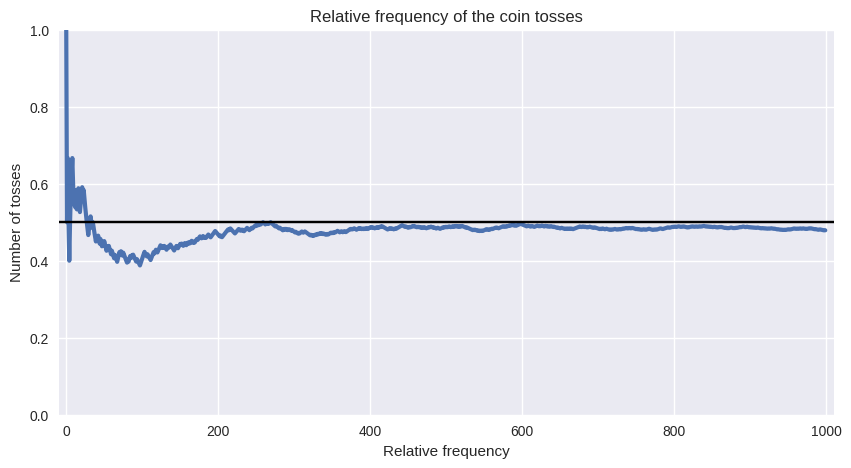

In [2]:
import matplotlib.pyplot as plt


with plt.style.context("seaborn-v0_8"):
    plt.figure(figsize=(10, 5))
    plt.title("Relative frequency of the coin tosses")
    plt.xlabel("Relative frequency")
    plt.ylabel("Number of tosses")
    
    # plotting the averages
    plt.plot(range(n_tosses), coin_toss_averages, linewidth=3) # the averages
    
    # plotting the true expected value
    plt.plot([-100, n_tosses+100], [0.5, 0.5], c="k")
    plt.xlim(-10, n_tosses+10)  
    plt.ylim(0, 1)
    plt.show()

In [3]:
more_coin_tosses = bernoulli.rvs(p=0.5, size=(n_tosses, n_tosses))
more_coin_toss_averages = np.array([[np.mean(more_coin_tosses[i][:j+1]) for j in idx]
                                     for i in idx])

We can visualize the distributions on histograms.

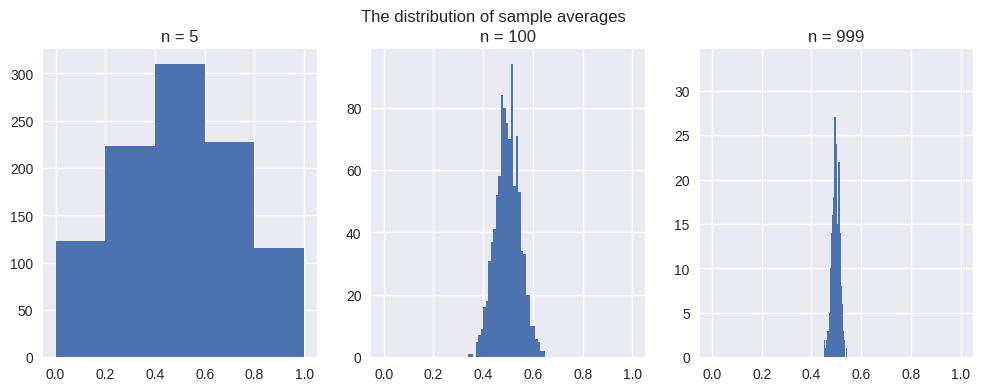

In [4]:
with plt.style.context("seaborn-v0_8"):
    fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=False)
    fig.suptitle("The distribution of sample averages")
    for ax, i in zip(axs, [5, 100, 999]):
        x = [k/i for k in range(i+1)]
        y = more_coin_toss_averages[:, i]
        ax.hist(y, bins=x)
        ax.set_title(f"n = {i}")
    
    plt.show()

### ...rolling dice...

In [5]:
from scipy.stats import randint


n_rolls = 1000
idx = range(n_rolls)

dice_rolls = [randint.rvs(low=1, high=7) for _ in idx]
dice_roll_averages = [np.mean(dice_rolls[:k+1]) for k in idx]

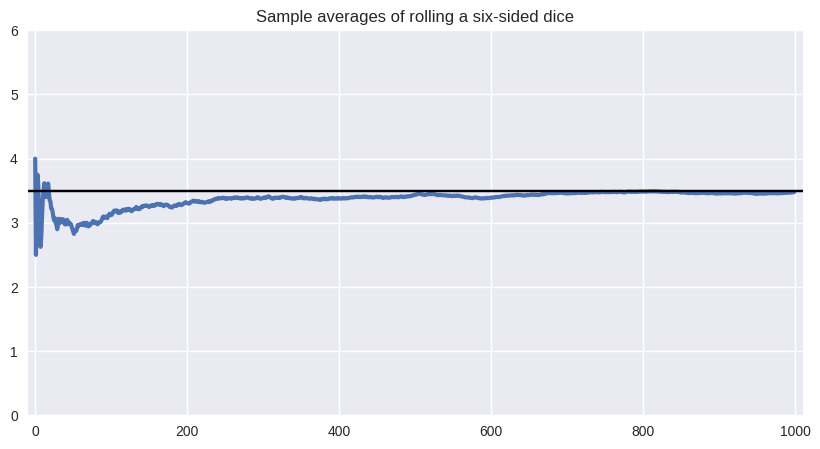

In [6]:
with plt.style.context("seaborn-v0_8"):
    plt.figure(figsize=(10, 5))
    plt.title("Sample averages of rolling a six-sided dice")
    
    # plotting the averages
    plt.plot(idx, dice_roll_averages, linewidth=3) # the averages
    
    # plotting the true expected value
    plt.plot([-100, n_rolls+100], [3.5, 3.5], c="k")
    
    plt.xlim(-10, n_rolls+10)
    plt.ylim(0, 6)
    plt.show()

In [7]:
more_dice_rolls = randint.rvs(low=1, high=7, size=(n_rolls, n_rolls))
more_dice_roll_averages = np.array([[np.mean(more_dice_rolls[i][:j+1]) for j in idx]
                                     for i in idx])

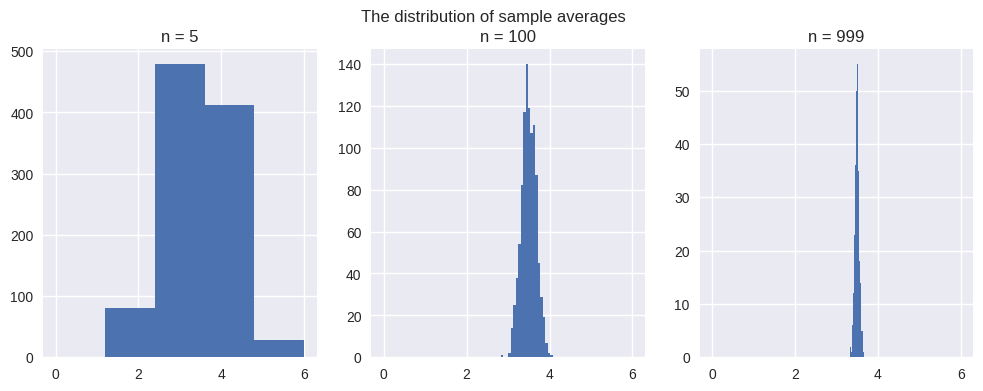

In [8]:
with plt.style.context("seaborn-v0_8"):
    fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=False)
    fig.suptitle("The distribution of sample averages")
    for ax, i in zip(axs, [5, 100, 999]):
        x = [6*k/i for k in range(i+1)]
        y = more_dice_roll_averages[:, i]
        ax.hist(y, bins=x)
        ax.set_title(f"n = {i}")

    plt.show()

## Information theory

### Information and entropy

In [9]:
def bernoulli_entropy(p):
    return -p*np.log(p) - (1 - p)*np.log(1 - p)

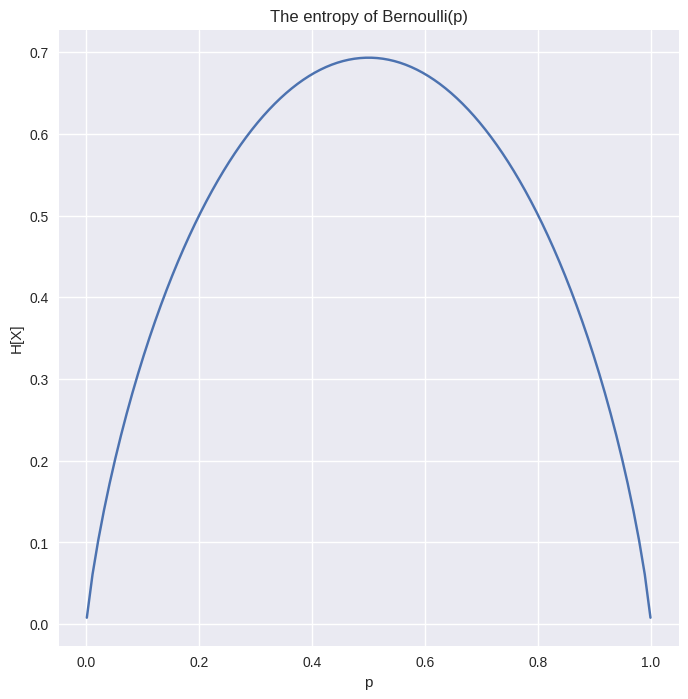

In [10]:
X = np.linspace(0.001, 0.999, 100)
y = bernoulli_entropy(X)


with plt.style.context('seaborn-v0_8'):
    plt.figure(figsize=(8, 8))
    plt.xlabel("p")
    plt.ylabel("H[X]")
    plt.title("The entropy of Bernoulli(p)")
    plt.plot(X, y)
    plt.show()


In [11]:
def geom_entropy(p):
    return -(p*np.log(p) + (1 - p)*np.log(1 - p))/p

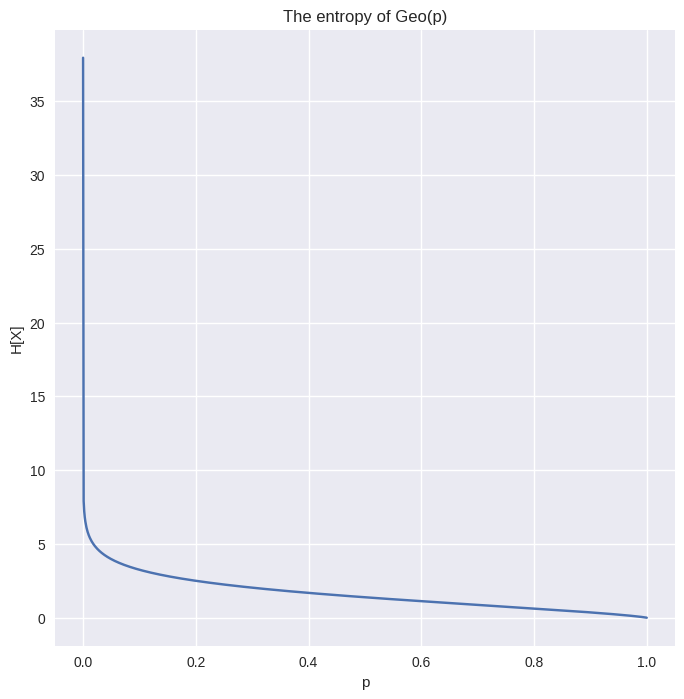

In [12]:
X = np.linspace(1e-16, 1-1e-16, 1000)
y = geom_entropy(X)


with plt.style.context('seaborn-v0_8'):
    plt.figure(figsize=(8, 8))
    plt.xlabel("p")
    plt.ylabel("H[X]")
    plt.title("The entropy of Geo(p)")
    plt.plot(X, y)
    plt.show()